## Ładowanie metadanych

In [137]:
import pandas as pd
import numpy as np
from scipy.stats import itemfreq
import matplotlib.pyplot as plt

## Metadane o pacjentach bez objawów Sars-Covid-19

In [138]:
noncovid_meta=pd.read_csv("NonCovid-CT-Metainfo.csv")
noncovid_meta

,Unnamed: 0,image name,patient id
0,0,0.jpg,crawled_patient_0
1,1,1%0.jpg,crawled_patient_1
2,2,1%1.jpg,crawled_patient_1
3,3,1%2.jpg,crawled_patient_1
4,4,10%0.jpg,crawled_patient_10
...,...,...,...
392,392,2143.png,medpix_patient_32
393,393,2144.png,medpix_patient_32
394,394,2145.png,medpix_patient_32
395,395,2237.png,medpix_patient_52


#### Z powyższej bazy danych nie uda się raczej wyciągnąć nic ciekawego poza liczbą pacjentów.

In [139]:
len(pd.DataFrame(itemfreq(noncovid_meta["patient id"])).iloc[:,1])

<ipython-input-139-2ce5714aa64e>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  len(pd.DataFrame(itemfreq(noncovid_meta["patient id"])).iloc[:,1])


171

In [140]:
np.mean((pd.DataFrame(itemfreq(noncovid_meta["patient id"])).iloc[:,1]))

<ipython-input-140-7984afb0a56c>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  np.mean((pd.DataFrame(itemfreq(noncovid_meta["patient id"])).iloc[:,1]))


2.3216374269005846

#### W bazie jest 171 zdrowych pacjentów i po średnio 2.3 zdjęcia na zdrowego pacjenta.

## Metadane o pacjentach z objawami Sars-Cov-19

In [196]:
covid_meta_full=pd.read_excel("Covid-CT-Metainfo.xlsx")
covid_meta=covid_meta_full
covid_meta_full

,File name,Patient ID,Age,Gender,Location,Medical history,Time,Severity,Other diseases,DOI,Captions
0,2020.01.24.919183-p27-132.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,"Chest tightness, unproductive cough, pain and ...",NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
1,2020.01.24.919183-p27-133.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
2,2020.01.24.919183-p27-134.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
3,2020.01.24.919183-p27-135.png,Patient 1,41,M,"Wuhan, China","no history of hepatitis, tuberculosis or diabe...",day 6 after the onset of illness,same as above,NaN,NaN,['Figure 1. Chest radiographs of patient 1. a....
4,2020.02.10.20021584-p6-52%0.png,Patient 2,50,M,"Beijing, China",NaN,"Illness Day 8, Hospital Day 0",Early stage: Ground glass shadow in multiple l...,NaN,NaN,['Figure 1. A 50-year-old man with 2019 novel ...
...,...,...,...,...,...,...,...,...,...,...,...
345,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.ijid.2020.02.037,Computed tomography of the lungs revealed mass...
346,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.ijid.2020.02.037,Computed tomography of the lungs revealed mass...
347,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.ijid.2020.02.037,Computed tomography of the lungs revealed mass...
348,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.ijid.2020.02.037,Computed tomography of the lungs revealed mass...


#### Od razu widać, że ostatni rząd jest do wyrzucenia, bo nie ma w nim nawet nazwy pliku.

In [142]:
covid_meta=covid_meta.iloc[:-1]

#### Sprawdźmy, czy nie ma więcej podobnych wierszy?

In [143]:
covid_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File name        349 non-null    object
 1   Patient ID       349 non-null    object
 2   Age              169 non-null    object
 3   Gender           137 non-null    object
 4   Location         228 non-null    object
 5   Medical history  44 non-null     object
 6   Time             134 non-null    object
 7   Severity         178 non-null    object
 8   Other diseases   19 non-null     object
 9   DOI              203 non-null    object
 10  Captions         336 non-null    object
dtypes: object(11)
memory usage: 30.1+ KB


#### Na szczęście nie. Widać za to wiele braków w pozostałych wierszach niecała połowa pacjentów ma podane wiek, płeć, historię medyczną, czas choroby, ciężar jej przebiegu. Przez co do wytrenowania modelu będziemy musieli uzupełnić te braki bądź usunąć obserwacje z brakami.

## Zacznijmy od sprawdzenia liczby pacjentów w bazie danych

In [163]:
len(pd.DataFrame(itemfreq(covid_meta["Patient ID"])).iloc[:,1])

<ipython-input-163-d77259e31885>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  len(pd.DataFrame(itemfreq(covid_meta["Patient ID"])).iloc[:,1])


213

In [165]:
np.mean((pd.DataFrame(itemfreq(covid_meta["Patient ID"])).iloc[:,1]))

<ipython-input-165-5a3ec912b42c>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  np.mean((pd.DataFrame(itemfreq(covid_meta["Patient ID"])).iloc[:,1]))


1.6384976525821595

#### W bazie jest 213 chorych pacjentów i po średnio 1.6 zdjęcia na chorego pacjenta.

## Przyjrzyjmy się wiekowi pacjentów w bazie danych:

In [144]:
age=covid_meta["Age"].dropna()
age

0      41
1      41
2      41
3      41
4      50
       ..
319    40
320    40
321    40
322    40
323    40
Name: Age, Length: 169, dtype: object

In [145]:
age.unique()

array([41, 50, 65, 34, 36, 39, 45, 48, 63, 76, 72, 60, 64, 44, 37, 69, 57,
       71, 27, 55, 28, 21, 33, 'Young Child', 66, 23, 1, 49, 73, 70, 75,
       32, '40+', 46, 62, 59, 31, 40], dtype=object)

#### Na pierwszy rzut oka dane te wydają się w porzątku, ale po sprawdzeniu jakie wartości są w tej kolumnie znajdujemy wpisy takie jak "Young Child", czy 40+. Zamienimy te dane "40+" na "40" i "Young Child" na "10". Pozwoli nam to zobrazować te dane choćby na boxplocie.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7a39dd8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7a39dde80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7a39dd550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7a39d05e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7a39d0970>],
 'means': []}

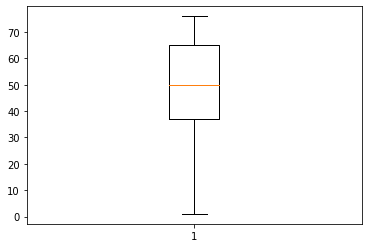

In [146]:
age=[x if x!="40+" else 40 for x in age]
age=[x if x!="Young Child" else 10 for x in age]
plt.boxplot(age)

#### Czyli w większości mamy do czynienia z osobami w wieku ok. 40-60 lat.

In [147]:
print(len(list(filter(lambda x:x<=18,age)))/len(age))
print(len(list(filter(lambda x:x>=67,age)))/len(age))

0.05917159763313609
0.15384615384615385


#### Dodatkowo mamy do czynienia tylko w 6% przypadków z dziećmi i w 15% z seniorami.

## Teraz skupmy się na płci pacjentów.

In [148]:
gender=covid_meta["Gender"]
gender=gender.dropna()
itemfreq(gender)

<ipython-input-148-bda02d4f1b1c>:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(gender)


array([['F', 37],
       ['F ', 14],
       ['M', 77],
       ['M ', 9]], dtype=object)

#### Mamy problem ze spacjami.

In [149]:
covid_meta["Gender"]=covid_meta["Gender"].replace("M ","M")
covid_meta["Gender"]=covid_meta["Gender"].replace("F ","F")
gender=covid_meta["Gender"]
gender=gender.dropna()
itemfreq(gender)

<ipython-input-149-5065035fa28b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_meta["Gender"]=covid_meta["Gender"].replace("M ","M")
<ipython-input-149-5065035fa28b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_meta["Gender"]=covid_meta["Gender"].replace("F ","F")
<ipython-input-149-5065035fa28b>:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(gender)


array([['F', 51],
       ['M', 86]], dtype=object)

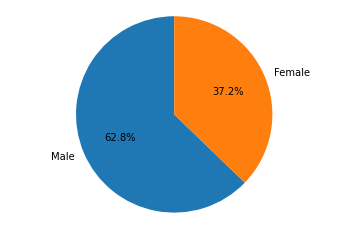

In [150]:
plt.pie([86,51],labels=["Male","Female"], startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()


#### W bazie danych wśród pacjentów ze specyfikowaną płcią większość stanowią mężczyźni.

## Lokacja nie przyda nam się w predykcji modelu dlatego od razu usuwamy tę zmienną.

In [151]:
covid_meta=covid_meta.drop("Location",axis=1)

## Historia medyczna to zmienna kategoryczna

Zbiór wymienianych chorób jest ograniczony więc możemy zakodować te dane 0 w przypadku braku stwierdzenia i nazwa choroby, gdy występowała ona w historii pacjenta. Do ćwiczenia modelu lepiej będzie zakodować te dane za pomocą One Hot Encodingu, ale analiza w ten sposób powinna byc wystarczająca.

In [152]:
(covid_meta["Medical history"]).unique()

array(['no history of hepatitis, tuberculosis or diabetes.', nan,
       'hypertension', 'without any underling diseases ',
       'Patient 9, a 49-year-old female admitted on 1 day post onset of illness (dpoi), showed the most obvious pulmonary image improvement. On 10 dpoi, one dose of 200 mL transfusion of CP was given. The SARS-CoV-2 RNA converted to negative on 12 dpoi. Compared with the result on 7 dpoi, massive infiltration and ground-glass attenuation disappeared on CT image performed on 13 dpoi, accompanied bya much better pulmonary function. ',
       'Patient 10, a 50-year-old male, was admitted on 3 dpoi and was given a 200 mL transfusion of CP on 20 dpoi. His chest CT presented massive infiltration and widespread ground-glass attenuation on admission andstarted to show a gradual absorption of lung lesions 5 days after CP transfusion. The SARS-CoV-2 RNA became negative on 25 dpoi. ',
       ' The patchy non-segmental ground grass opacity (GGO) adjacent to the parietal pleur

#### Niestety w tej kolumnie mamy wielki bałagan, są wiersze w których podany jest wiek pacjenta, sposób leczenia, temperatura ciała, symptomy, wypustki na języku czy moment dpoi. Ponieważ część z tych danych jest redundantna, albo zawiera się już w innych kolumnach, a danych o przebytych chorobach praktycznie nie ma, a nawet jak są to dana choroba występuje u zbyt małej populacji pacjentów, aby była to dobra próbka reprezentatywna, musimy zrezygnować z tej kolumny.

In [153]:
covid_meta=covid_meta.drop("Medical history",axis=1)

## Czas

In [154]:
(covid_meta["Time"]).unique()

array(['day 6 after the onset of illness',
       'Illness Day 8, Hospital Day 0 ', 'Illness Day 15, Hospital Day 7',
       'Illness Day 20, Hospital Day 12',
       'Illness Day 11, Hospital Day 3 ', nan,
       '2nd day of the course of disease',
       '7th day of the course of disease',
       '11th day of the course of disease',
       '15th day of the course of disease', 'day 1 from symptom onse ',
       'day 5  from symptom onse ', 'day 5 from symptom onse ',
       'day 7 from symptom onse ', 'day 7  from symptom onse ',
       'have fever for more than 3 days', 'have fever and cough', 'day 2',
       'day 10', 'day 18', '10 days before DIP treatment',
       '5 days before DIP treatment', '2 days before DIP treatment',
       '2 days after DIP treatment', '7 days after DIP treatment',
       'day 7', 'day 21', 'day 9', 'day 6', 'day 7 ', 'day 14', 'day 1',
       'first day', 'day 13', 'day 4-5 after admission',
       'day 11-12 after treatment', 'day 1 after symptom onset'

#### Zadanie predykcyjne polega na przewidzeniu, czy pacjent jest chory na podstawie jego tomografii komputerowej oraz danych pacjenta. Niemożliwym jest zdobycie danych o zaawansowaniu choroby przed stwierdzeniem jej wystąpienia- usuwamy kolumnę.

In [155]:
covid_meta=covid_meta.drop("Time",axis=1)

## Severity

In [156]:
(covid_meta["Severity"]).unique()

array(['Chest tightness, unproductive cough, pain and weakness for one week on presentation. Fever with body temperatures ranging from 37.2oC to 40oC. Severe cough with phlegm at onset of illness. Experienced dizziness. respiratory failure, was given high flow noninvasive ventilation. Physical examination of cardiovascular, abdominal and neurologic examination was normal. Mild lymphopenia (less than 900 cells per cubic milli-meter) was observed, but white blood cell and blood platelet count was normal in a complete blood count (CBC) test. Elevated levels of C-reactive protein (CRP, 41.4 mg/L of blood, reference range 0-6 mg/L) was observed and levels of aspartate aminotransferase, lactic dehydrogenase, and creatine kinase were slightly elevated in blood chemistry tests. The patient had mild hypoxemia with oxygen levels of 67mmHg by the Arterial Blood Gas (ABG) Test. On the first day of admission (day 6 after the onset of illness), chest radiographs were abnormal with air-space shadowin

#### Tu znowu nie mamy spójności jeśli chodzi o sposób wprowadzania danych do tabeli. Niekiedy dostajemy opis badania tomograficznego, niekiedy temperaturę, czy krótki napis typu: "light", "severe". Nawet jeśli lekarz bardziej szczegółowo opisywał stan zdrowia pacjenta to często skupiał się na zupełnie innych chorobach niż reszta lekarzy, którzy również postanowili to zrobić.

In [157]:
covid_meta=covid_meta.drop("Severity",axis=1)

## Other diseases

In [158]:
(covid_meta["Other diseases"]).unique()

array([nan, 'ordinary bacterial pneumonia', 'tumorous lesion in the lung',
       'secondary pulmonary tuberculosis',
       'bronchiectasis complicated with infection',
       'Heart failure with bilateral diffuse disease',
       'Heart failure with bilateral diffuse GGO disease',
       'single rounded subpleural GGO in left lung.',
       'COVID-19 with rounded GGO in bilateral lungs',
       'bilateral patchy patterns', 'pregnancy'], dtype=object)

#### Tu już możemy się pokusić o barplot.

Zliczmy osoby z problemami z sercem:

In [159]:
itemfreq(covid_meta["Other diseases"].dropna())

<ipython-input-159-c94912e3f943>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(covid_meta["Other diseases"].dropna())


array([['COVID-19 with rounded GGO in bilateral lungs', 1],
       ['Heart failure with bilateral diffuse GGO disease', 1],
       ['Heart failure with bilateral diffuse disease', 1],
       ['bilateral patchy patterns', 4],
       ['bronchiectasis complicated with infection', 2],
       ['ordinary bacterial pneumonia', 2],
       ['pregnancy', 3],
       ['secondary pulmonary tuberculosis', 2],
       ['single rounded subpleural GGO in left lung.', 1],
       ['tumorous lesion in the lung', 2]], dtype=object)

Czyli na GGO cierpi 3 pacjentów, 2 ma problemy z sercem, 2 "bronchiectasis complicated with infection", są 3 kobiety są w ciąży(ta "choroba" na pewno nie będzie mieć wpływu na predykcję), 2 pacjentów cierpi na 'tumorous lesion in the lung', 4 na "bilateral patchy patterns", 2 na 'ordinary bacterial pneumonia' i 2 na 'secondary pulmonary tuberculosis'.

<BarContainer object of 8 artists>

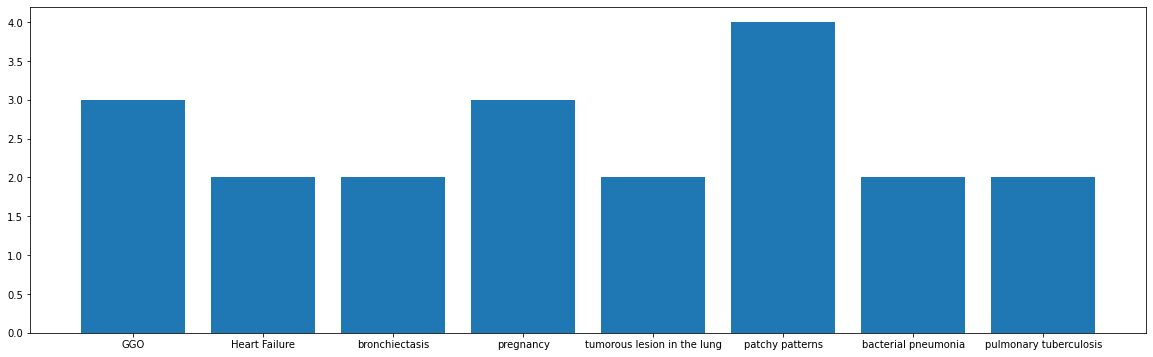

In [160]:
h=[3,2,2,3,2,4,2,2]
bars=["GGO","Heart Failure","bronchiectasis", "pregnancy","tumorous lesion in the lung","patchy patterns","bacterial pneumonia","pulmonary tuberculosis"]
plt.figure(figsize=(20,6))
plt.bar(bars,h)

#### Niestety próbki te są za małe, aby były reprezentatyzne dla populacji.

## Pozostałe kolumny nam się nie przydadzą.

In [161]:
covid_meta=covid_meta.drop(["Other diseases","DOI","Captions"],axis=1)
covid_meta

,File name,Patient ID,Age,Gender
0,2020.01.24.919183-p27-132.png,Patient 1,41,M
1,2020.01.24.919183-p27-133.png,Patient 1,41,M
2,2020.01.24.919183-p27-134.png,Patient 1,41,M
3,2020.01.24.919183-p27-135.png,Patient 1,41,M
4,2020.02.10.20021584-p6-52%0.png,Patient 2,50,M
...,...,...,...,...
344,Recurrence-of-positive-SARS-CoV-2-RNA-in-C_202...,Patient 215,NaN,NaN
345,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN
346,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN
347,Talaromyces-marneffei-infection-relapse-presen...,Patient 216,NaN,NaN


In [167]:
covid_meta.describe()

,File name,Patient ID,Age,Gender
count,349,349,169,137
unique,349,213,38,2
top,2020.03.08.20031658-p15-106.png,Patient 2,50,M
freq,1,16,24,86


#### Co ciekawe Pacjent 2 ma aż 16 zdjęć swojej klatki piersiowej w tej bazie danych.

# Pora na analizę tomografii komputerowej

#### Rozpocznijmy od przyjrzenia się pacjentowi 2

4    Illness Day 8, Hospital Day 0 
Name: Time, dtype: object


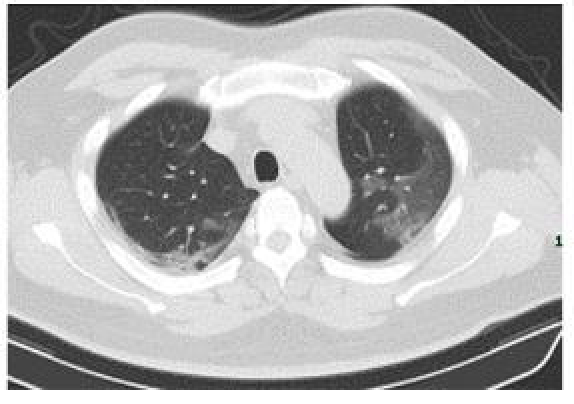

5    Illness Day 8, Hospital Day 0 
Name: Time, dtype: object


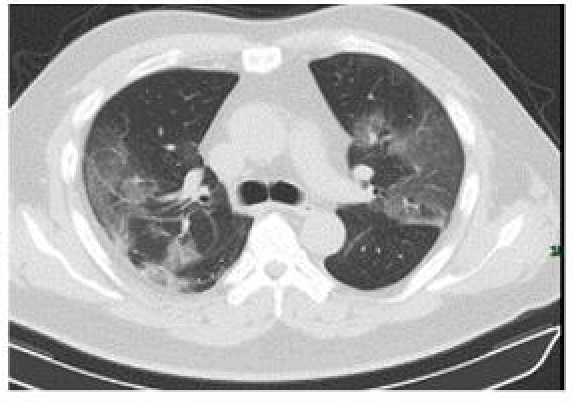

12    Illness Day 8, Hospital Day 0 
Name: Time, dtype: object


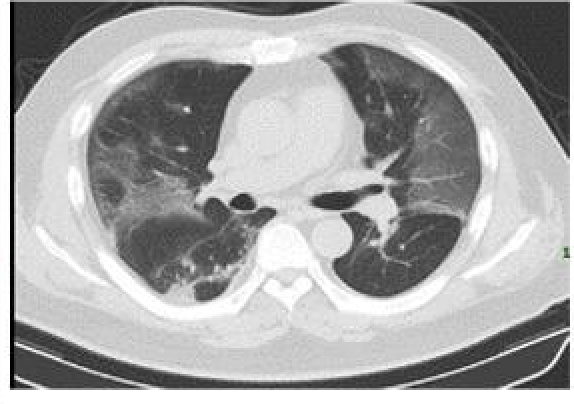

13    Illness Day 8, Hospital Day 0 
Name: Time, dtype: object


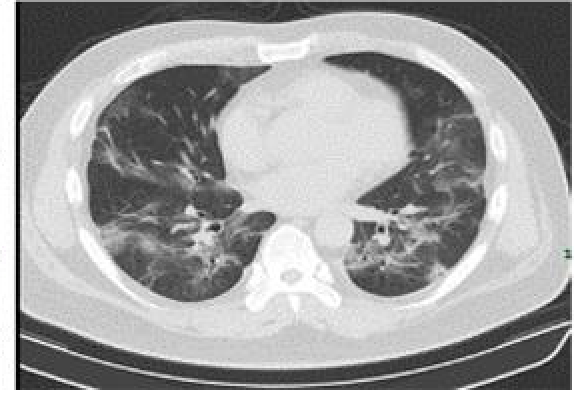

14    Illness Day 11, Hospital Day 3 
Name: Time, dtype: object


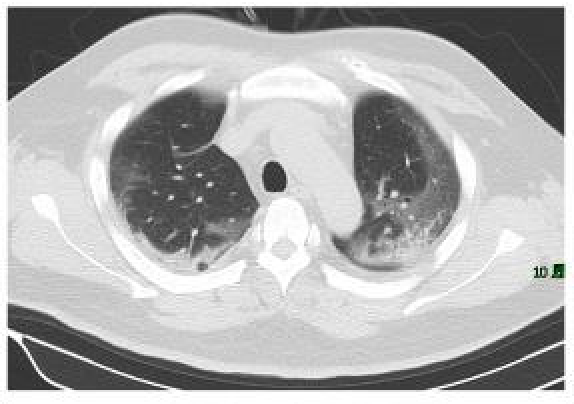

15    Illness Day 11, Hospital Day 3 
Name: Time, dtype: object


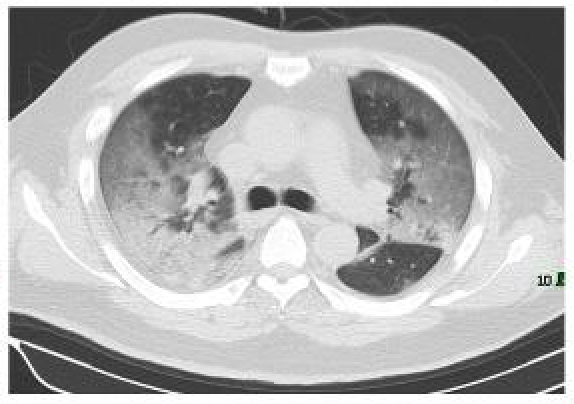

16    Illness Day 11, Hospital Day 3 
Name: Time, dtype: object


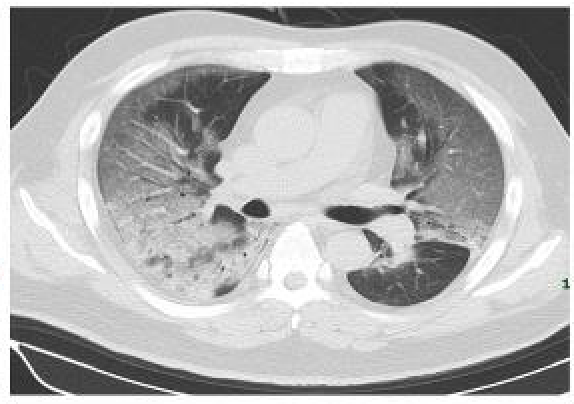

17    Illness Day 11, Hospital Day 3 
Name: Time, dtype: object


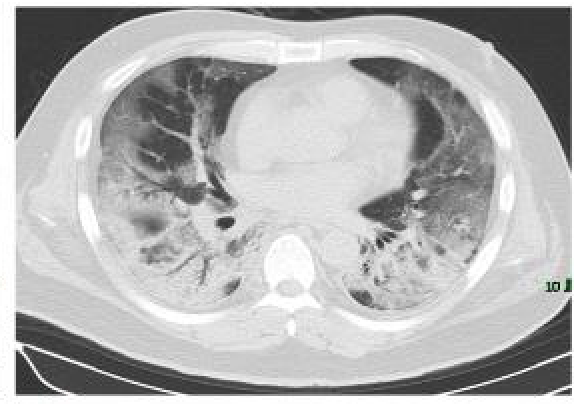

18    Illness Day 15, Hospital Day 7
Name: Time, dtype: object


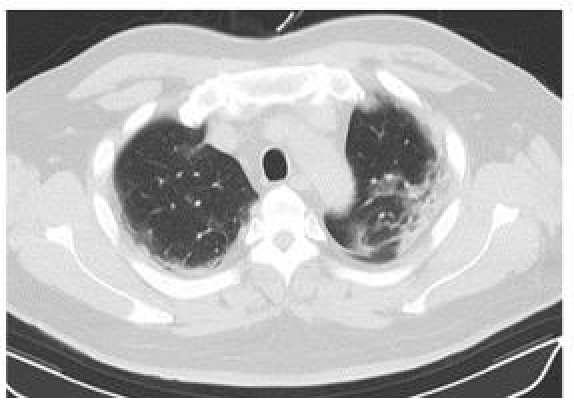

19    Illness Day 15, Hospital Day 7
Name: Time, dtype: object


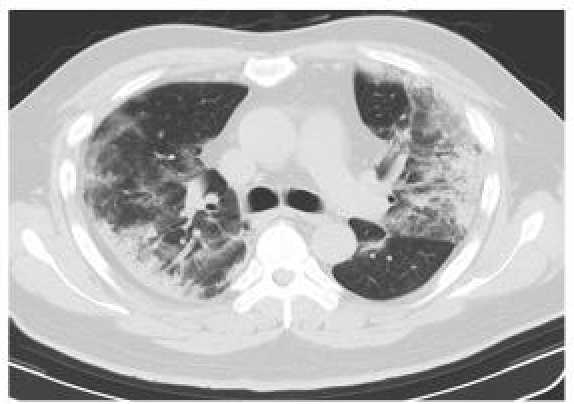

6    Illness Day 15, Hospital Day 7
Name: Time, dtype: object


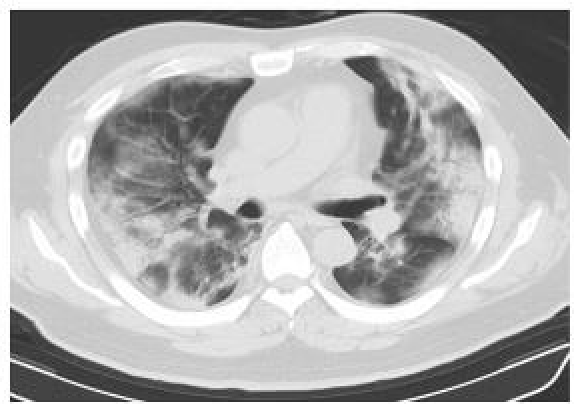

7    Illness Day 15, Hospital Day 7
Name: Time, dtype: object


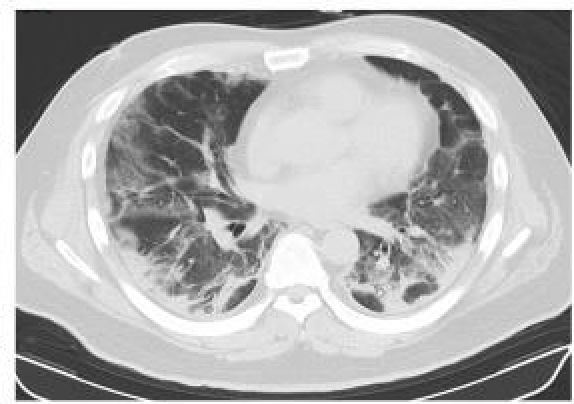

8    Illness Day 20, Hospital Day 12
Name: Time, dtype: object


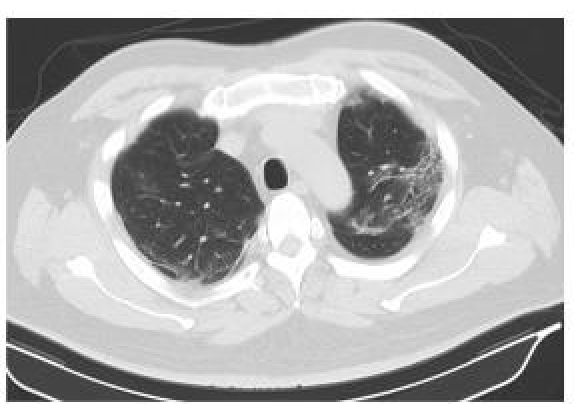

9    Illness Day 20, Hospital Day 12
Name: Time, dtype: object


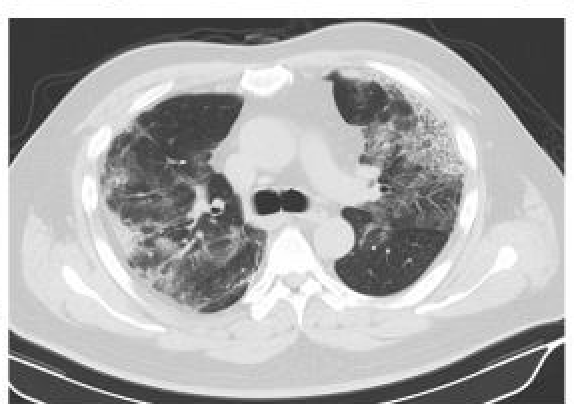

10    Illness Day 20, Hospital Day 12
Name: Time, dtype: object


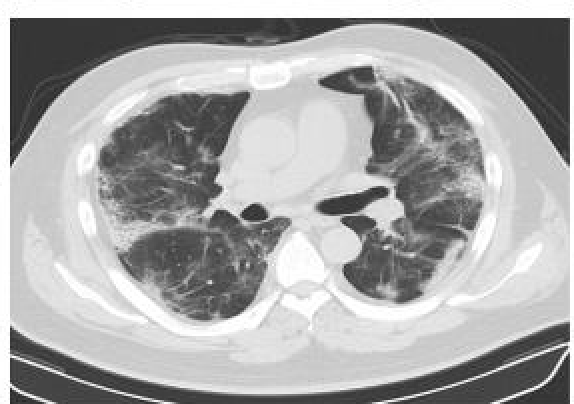

11    Illness Day 20, Hospital Day 12
Name: Time, dtype: object


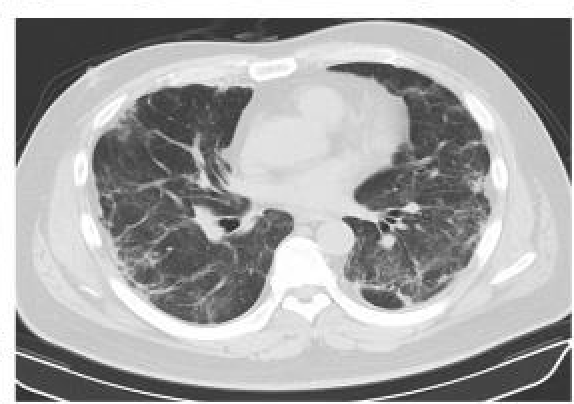

In [200]:
from PIL import Image, ImageDraw
for i in range(16):
    p2=covid_meta_full[covid_meta_full["Patient ID"]=="Patient 2"]
    print(covid_meta_full[covid_meta_full["File name"]=="2020.02.10.20021584-p6-52%"+str(i)+".png"]["Time"])
    image=Image.open("./Covid-CT/CT_COVID/2020.02.10.20021584-p6-52%"+str(i)+".png")
    width=image.size[0]
    height=image.size[1]
    display(image.resize((width*2,  height*2), Image.NEAREST))

#### Jedyny zauważalny objaw postępu choroby to rozrost jasnych regionów w płucach.

## Może lepiej będzie porównać przykładowego pacjenta chorego i zdrowego, aby łatwiej znaleźć różnice?

### Chory

In [201]:
import random

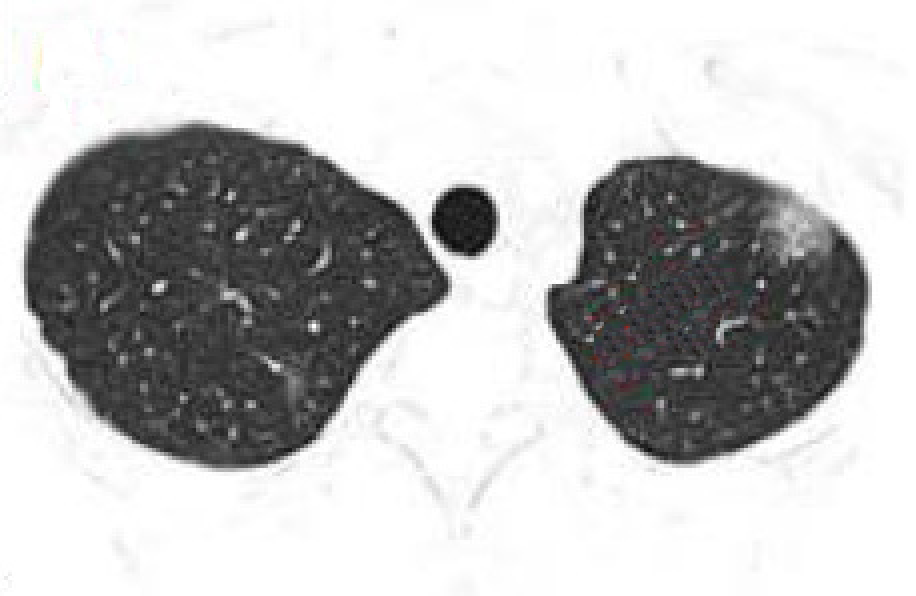

In [228]:
image=Image.open("./Covid-CT/CT_COVID/"+covid_meta.iloc[random.randint(0,len(covid_meta))]["File name"])
width=image.size[0]
height=image.size[1]
display(image.resize((width*2,  height*2), Image.NEAREST))
    

### Zdrowy

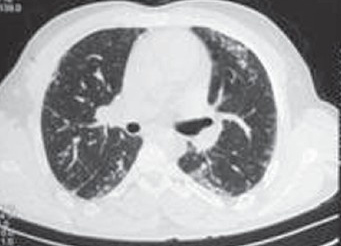

In [230]:
image=Image.open("./Covid-CT/CT_NonCOVID/"+noncovid_meta.iloc[random.randint(0,len(noncovid_meta))]["image name"])
width=image.size[0]
height=image.size[1]
display(image.resize((width,  height), Image.NEAREST))
    

### Na wikipedii piszą, że chorobę można rozpoznać poprzez jasne regiony w płucah. Osobiście jednak nie jestem w stanie sklasyfikować poprawnie, czy pacjent jest chory, czy zdrowy w 100% przypadków. Zwłaszcza, że zdjęcia te często są różnej wielkości na innych odcinkach kręgosłupa i o wyrażnie różniącym się balansie bieli i czerni. Przed uczeniem modelu wydaje się, że trzeba będzie w jakiś sposób unormować dane wejściowe.